In [1]:
!pip install scienceplots

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(('science','no-latex'))
plt.rcParams['axes.unicode_minus'] = False

In [7]:
data = pd.read_excel('../data/Sentometrics_US_Media_Climate_Change_Index.xlsx',
                   sheet_name = "2023 update monthly", skiprows=6, index_col=0, parse_dates=True)
data.head()

,Aggregate,cluster_Business Impact,cluster_Environmental Impact,cluster_Societal Debate,cluster_Research,Agreements/Actions,Agriculture Shifts,Airline Industry,Arctic Wildlife,Car Industry,...,Hurricanes/Floods,Legal Actions,Marine Wildlife,Political Campaign,Renewable Energy,Scientific Studies,Social Events,Tourism,UN/IPCC Reports,Water/Drought
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-01,0.670882,0.724689,0.634144,0.522989,0.540001,0.723770,0.579213,0.617377,0.473769,0.814800,...,0.219000,0.735931,0.281948,0.527560,0.355534,0.531972,0.443459,0.492221,0.440955,0.604657
2003-02-01,0.599651,0.681383,0.575126,0.358989,0.517911,0.711091,0.227526,0.492892,0.281511,0.513489,...,0.773497,0.870956,0.508305,0.260103,0.483923,0.496471,0.418194,0.468274,0.432443,0.466395
2003-03-01,0.405426,0.374329,0.454074,0.402151,0.322407,0.281523,0.263173,0.316483,0.129596,0.478289,...,0.241296,0.358616,0.295517,0.479183,0.543054,0.460373,0.324775,0.304384,0.262541,0.600739
2003-04-01,0.438446,0.436445,0.328511,0.457464,0.335117,0.355389,0.235146,0.655663,0.118261,0.338155,...,0.157286,0.535568,0.220386,0.593473,0.379494,0.474708,0.385128,0.308005,0.268713,0.409758
2003-05-01,0.375706,0.414676,0.294991,0.344434,0.262923,0.469369,0.314070,0.381374,0.068508,0.471628,...,0.258719,0.373385,0.274674,0.416606,0.395942,0.301688,0.278360,0.246417,0.168202,0.305166


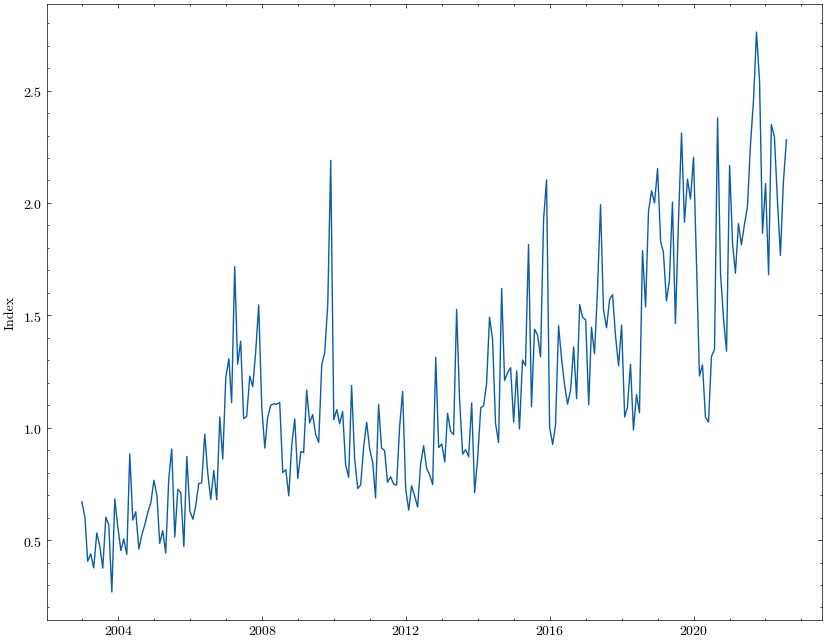

In [14]:
plt.figure(figsize=(10, 8))
plt.plot(data['Aggregate'])
plt.ylabel('Index')
plt.show()

In [15]:
import numpy as np

# Initial parameters
num_firms = 5
np.random.seed(42)  # For reproducibility

# Firm identifiers
firms = ['Firm_A', 'Firm_B', 'Firm_C', 'Firm_D', 'Firm_E']

# Firm-specific parameters
betas = np.random.rand(num_firms)  # Market betas
g = np.array([1, 1, -1, -1, 1])    # ESG exposures (positive for green, negative for brown)
u_0 = np.random.rand(num_firms)    # Initial expected payoffs

# ESG factors
d_0 = 0.5  # Initial average ESG taste
d_1 = 0.7  # Shift in ESG taste

# Risk parameters
z_m = np.random.randn()  # Macro output factor shock
z_g = np.random.randn()  # ESG-related customer demand shock
a = 1.0  # Risk aversion parameter

print("Initial expected payoffs (u_0):", u_0)
print("Market betas (betas):", betas)
print("ESG exposures (g):", g)
print("Macro output factor shock (z_m):", z_m)
print("ESG-related customer demand shock (z_g):", z_g)


Initial expected payoffs (u_0): [0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]
Market betas (betas): [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
ESG exposures (g): [ 1  1 -1 -1  1]
Macro output factor shock (z_m): -0.4694743859349521
ESG-related customer demand shock (z_g): 0.5425600435859647


In [16]:
# Calculate firm profits at time 1 considering customer channel
u_1 = u_0 + z_m * betas + z_g * g

print("\nFirm profits at time 1 (u_1):", u_1)



Firm profits at time 1 (u_1): [ 0.52271757  0.15430764 -0.0200363  -0.22249986  1.17738587]


In [17]:
# Calculate stock prices at time 1- (just before payoffs are realized)
p_1_minus = u_1 / (1 - (g / a) * d_1)

print("\nStock prices at time 1- (p_1_minus):", p_1_minus)



Stock prices at time 1- (p_1_minus): [ 1.74239191  0.5143588  -0.01178606 -0.13088227  3.92461955]


In [18]:
# Calculate unexpected returns
unexpected_returns = p_1_minus - u_0

print("\nUnexpected returns:", unexpected_returns)



Unexpected returns: [ 1.58639739  0.45627519 -0.87796221 -0.73199728  3.21654698]
